## INVESTIGATION of G. scandens BEAKS DEPTH

<li> EDA of beak depth in 1975 and 2012 </li>
<li> Parameters estimates of mean beak depth </li>
<li> Hypothesis test: did the beak get deeper? </li>

In [43]:
# import modules that we need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [6]:
df_1975 = pd.read_csv('finch_beaks_1975.csv')
df_1975.head()

,band,species,"Beak length, mm","Beak depth, mm"
0,2,fortis,9.4,8.0
1,9,fortis,9.2,8.3
2,12,fortis,9.5,7.5
3,15,fortis,9.5,8.0
4,305,fortis,11.5,9.9


In [77]:
# rename the df_1975 columns
df_1975.columns = ['band', 'species', 'blength', 'bdepth', 'year']

df_1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 5 columns):
band       403 non-null int64
species    403 non-null object
blength    403 non-null float64
bdepth     403 non-null float64
year       403 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 15.8+ KB


In [78]:
df_2012 = pd.read_csv('finch_beaks_2012.csv')
df_2012['year'] = 2012
df_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 5 columns):
band       248 non-null int64
species    248 non-null object
blength    248 non-null float64
bdepth     248 non-null float64
year       248 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 9.8+ KB


In [37]:
# concatenate two DataFrames
df_concat = pd.concat([df_1975, df_2012], sort= True)
df_concat.head()

,band,bdepth,blength,species,year
0,2,8.0,9.4,fortis,1975
1,9,8.3,9.2,fortis,1975
2,12,7.5,9.5,fortis,1975
3,15,8.0,9.5,fortis,1975
4,305,9.9,11.5,fortis,1975


In [79]:
# select only bdepth and year from the DataFrame!
df = df_concat[['bdepth', 'year']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 247
Data columns (total 2 columns):
bdepth    651 non-null float64
year      651 non-null int64
dtypes: float64(1), int64(1)
memory usage: 35.3 KB


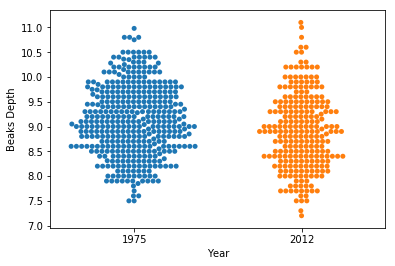

In [80]:
# plot out the beeswarm plot of year and beak depth!

_ = sns.swarmplot(x='year', y='bdepth', data=df)

_ = plt.xlabel('Year')
_ = plt.ylabel('Beaks Depth')
plt.show()

# ECDFs of beak depths


In [82]:
# bd_1975 = np.array(df_1975['bdepth'])
# bd_2012 = np.array(df_2012['bdepth'])


In [83]:
bd_1975 = np.array([  8.4 ,   8.8 ,   8.4 ,   8.  ,   7.9 ,   8.9 ,   8.6 ,   8.5 ,
         8.9 ,   9.1 ,   8.6 ,   9.8 ,   8.2 ,   9.  ,   9.7 ,   8.6 ,
         8.2 ,   9.  ,   8.4 ,   8.6 ,   8.9 ,   9.1 ,   8.3 ,   8.7 ,
         9.6 ,   8.5 ,   9.1 ,   9.  ,   9.2 ,   9.9 ,   8.6 ,   9.2 ,
         8.4 ,   8.9 ,   8.5 ,  10.4 ,   9.6 ,   9.1 ,   9.3 ,   9.3 ,
         8.8 ,   8.3 ,   8.8 ,   9.1 ,  10.1 ,   8.9 ,   9.2 ,   8.5 ,
        10.2 ,  10.1 ,   9.2 ,   9.7 ,   9.1 ,   8.5 ,   8.2 ,   9.  ,
         9.3 ,   8.  ,   9.1 ,   8.1 ,   8.3 ,   8.7 ,   8.8 ,   8.6 ,
         8.7 ,   8.  ,   8.8 ,   9.  ,   9.1 ,   9.74,   9.1 ,   9.8 ,
        10.4 ,   8.3 ,   9.44,   9.04,   9.  ,   9.05,   9.65,   9.45,
         8.65,   9.45,   9.45,   9.05,   8.75,   9.45,   8.35])
bd_2012 = np.array([  9.4 ,   8.9 ,   9.5 ,  11.  ,   8.7 ,   8.4 ,   9.1 ,   8.7 ,
        10.2 ,   9.6 ,   8.85,   8.8 ,   9.5 ,   9.2 ,   9.  ,   9.8 ,
         9.3 ,   9.  ,  10.2 ,   7.7 ,   9.  ,   9.5 ,   9.4 ,   8.  ,
         8.9 ,   9.4 ,   9.5 ,   8.  ,  10.  ,   8.95,   8.2 ,   8.8 ,
         9.2 ,   9.4 ,   9.5 ,   8.1 ,   9.5 ,   8.4 ,   9.3 ,   9.3 ,
         9.6 ,   9.2 ,  10.  ,   8.9 ,  10.5 ,   8.9 ,   8.6 ,   8.8 ,
         9.15,   9.5 ,   9.1 ,  10.2 ,   8.4 ,  10.  ,  10.2 ,   9.3 ,
        10.8 ,   8.3 ,   7.8 ,   9.8 ,   7.9 ,   8.9 ,   7.7 ,   8.9 ,
         9.4 ,   9.4 ,   8.5 ,   8.5 ,   9.6 ,  10.2 ,   8.8 ,   9.5 ,
         9.3 ,   9.  ,   9.2 ,   8.7 ,   9.  ,   9.1 ,   8.7 ,   9.4 ,
         9.8 ,   8.6 ,  10.6 ,   9.  ,   9.5 ,   8.1 ,   9.3 ,   9.6 ,
         8.5 ,   8.2 ,   8.  ,   9.5 ,   9.7 ,   9.9 ,   9.1 ,   9.5 ,
         9.8 ,   8.4 ,   8.3 ,   9.6 ,   9.4 ,  10.  ,   8.9 ,   9.1 ,
         9.8 ,   9.3 ,   9.9 ,   8.9 ,   8.5 ,  10.6 ,   9.3 ,   8.9 ,
         8.9 ,   9.7 ,   9.8 ,  10.5 ,   8.4 ,  10.  ,   9.  ,   8.7 ,
         8.8 ,   8.4 ,   9.3 ,   9.8 ,   8.9 ,   9.8 ,   9.1 ])

In [84]:
# ecdf funtion

def ecdf(data):
    # number of data points
    n = len(data)
    

    x = np.sort(data)
    y = np.arange(1, n+1) / n
    
    return x, y

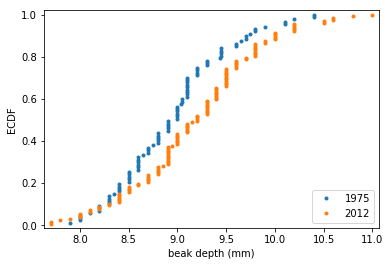

In [85]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
_ = plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

# Parameter estimates of beak depths


In [60]:
# call the draw_bs_reps() function
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

In [86]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06110381 0.39067434] mm


# Hypothesis test: Are beaks deeper in 2012?


>Is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

>Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.



In [87]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)


p = 0.0031
